In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con = sqlite3.connect("FPA_FOD_20170508.sqlite")
cur = con.cursor()
fires = pd.read_sql('SELECT * FROM fires', con)
print(fires.shape)
con.close()

(1880465, 39)


In [3]:
epoch = pd.to_datetime(0, unit='s').to_julian_date()
discovery_dates = pd.to_datetime(fires['DISCOVERY_DATE'] - epoch, unit='D')
fires['DISCOVERY_DATE']=discovery_dates

In [4]:
fires = fires.sort_values(by=['DISCOVERY_DATE'])

In [5]:
fires

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
774670,774671,878199,SCHMIDT_56011992,NONFED,ST-WYWYS,ST/C&L,USWYWYS,Wyoming State Forestry,WYWYS,Wyoming State Forestry,...,A,41.642490,-108.245102,14.0,MISSING/NOT SPECIFIED,WY,Sweetwater,037,Sweetwater,b'\x00\x01\xad\x10\x00\x00\xcc\xd1\r\xc1\xaf\x...
961584,961585,1089849,TFS_FL_39954,NONFED,ST-FLFLS,ST/C&L,USFLFLS,Florida Forest Service,FLFLS12,FLS Orlando District,...,B,28.300000,-80.730000,14.0,MISSING/NOT SPECIFIED,FL,Brevard,009,Brevard,b'\x00\x01\xad\x10\x00\x00\x1c\x85\xebQ\xb8.T\...
961583,961584,1089848,TFS_FL_39953,NONFED,ST-FLFLS,ST/C&L,USFLFLS,Florida Forest Service,FLFLS18,FLS Everglades District,...,C,25.950000,-80.450000,14.0,MISSING/NOT SPECIFIED,FL,Miami Dade,086,Miami-Dade,b'\x00\x01\xad\x10\x00\x00\xcc\xcc\xcc\xcc\xcc...
603990,603991,651826,SFO-TX01430692-10422355,NONFED,ST-NASF,ST/C&L,USTXHAS,Texas Forest Service - Henderson Area,TXHAS,Texas Forest Service - Henderson Area,...,B,31.664580,-94.589580,14.0,MISSING/NOT SPECIFIED,TX,Nacogdoches,347,Nacogdoches,b'\x00\x01\xad\x10\x00\x00\x08\x98\xc0\xad\xbb...
746120,746121,845656,SC_24841,NONFED,ST-SCSCS,ST/C&L,USSCSCS,South Carolina Forestry Commission,SCSCS,South Carolina Forestry Commission,...,B,33.379167,-80.620833,14.0,MISSING/NOT SPECIFIED,SC,38,075,Orangeburg,"b""\x00\x01\xad\x10\x00\x00x'\xb8\xbb\xbb'T\xc0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849700,1849701,300276766,SFO-2015TXPRI593558,NONFED,ST-NASF,ST/C&L,USTXTXS,Texas A & M Forest Service,TXPRI,Texas Forest Service,...,A,34.244730,-102.828169,14.0,MISSING/NOT SPECIFIED,TX,Bailey,017,Bailey,b'\x00\x01\xad\x10\x00\x00\xe4\xa3\x8c\xb8\x00...
1829982,1829983,300250027,SFO-2015TXPRI592861,NONFED,ST-NASF,ST/C&L,USTXTXS,Texas A & M Forest Service,TXPRI,Texas Forest Service,...,A,31.658725,-97.473990,14.0,MISSING/NOT SPECIFIED,TX,Bosque,035,Bosque,"b""\x00\x01\xad\x10\x00\x00`('\xdaU^X\xc0\xd0\x..."
1832050,1832051,300253490,SFO-2015TXLFDX594882,NONFED,ST-NASF,ST/C&L,USTXTXS,Texas A & M Forest Service,TXLFDX,Local Fire Department,...,B,32.116021,-96.325207,14.0,MISSING/NOT SPECIFIED,TX,Navarro,349,Navarro,b'\x00\x01\xad\x10\x00\x00\x88[\x051\xd0\x14X\...
1831007,1831008,300251694,SFO-2015TXLFDX594491,NONFED,ST-NASF,ST/C&L,USTXTXS,Texas A & M Forest Service,TXLFDX,Local Fire Department,...,A,32.439411,-94.947366,14.0,MISSING/NOT SPECIFIED,TX,Gregg,183,Gregg,b'\x00\x01\xad\x10\x00\x00\x1cv\x95\xa4\xa1\xb...


In [6]:
fires.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

Text(0.5, 0.98, 'Distribution of fire size by class')

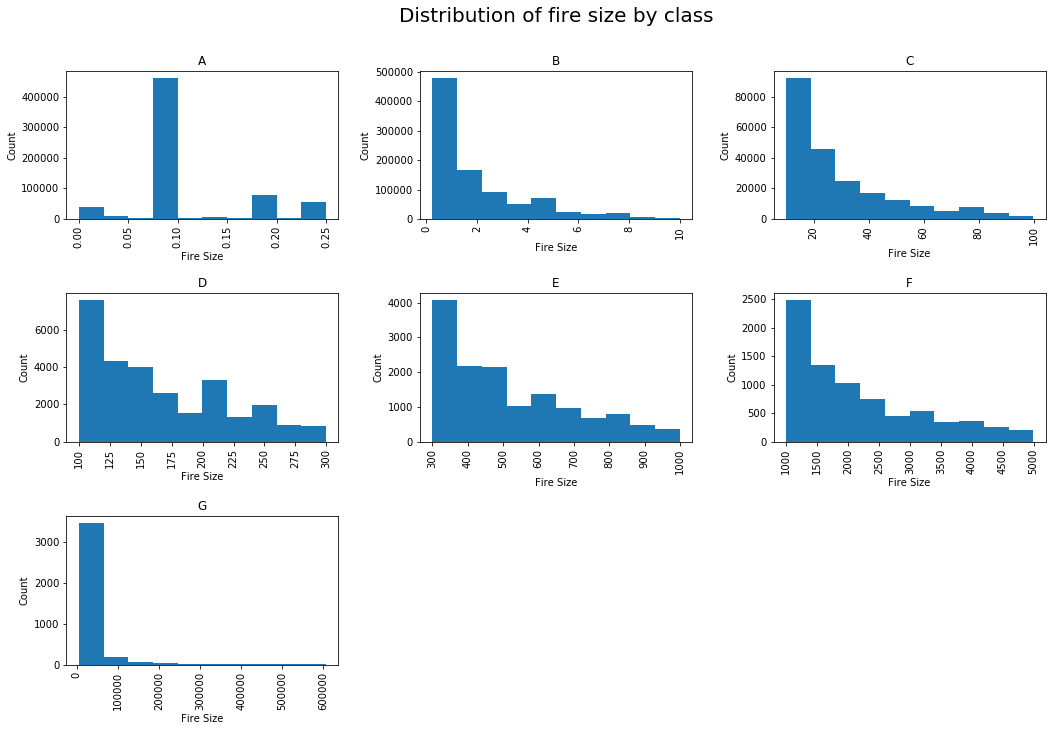

In [63]:
fig, ax = plt.subplots(figsize=(17, 11))
axes = fires.hist(column='FIRE_SIZE', by='FIRE_SIZE_CLASS', ax=ax)
for sax in axes:
    for ax in sax:
        ax.set_xlabel('Fire Size')
        ax.set_ylabel('Count')
fig.suptitle('Distribution of fire size by class', fontsize=20)

In [ ]:
# Most fires appear to come from classes A, B and C. These classes contain the fires that spread up to 100 acres.
# As expected, the biggest fires are the rearest.

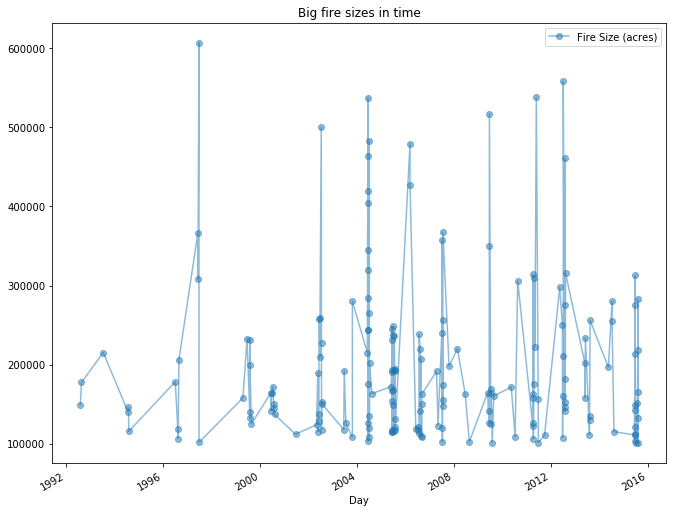

In [64]:
fires.loc[fires['FIRE_SIZE'] > 100000].rename(columns={"DISCOVERY_DATE": "Day", "FIRE_SIZE": "Fire Size (acres)"}).plot(x='Day', y='Fire Size (acres)', marker='o', linestyle='-', alpha=0.5, figsize=(11, 9), legend=True, title='Big fire sizes in time')

In [8]:
# Big fires appear to have no trend.

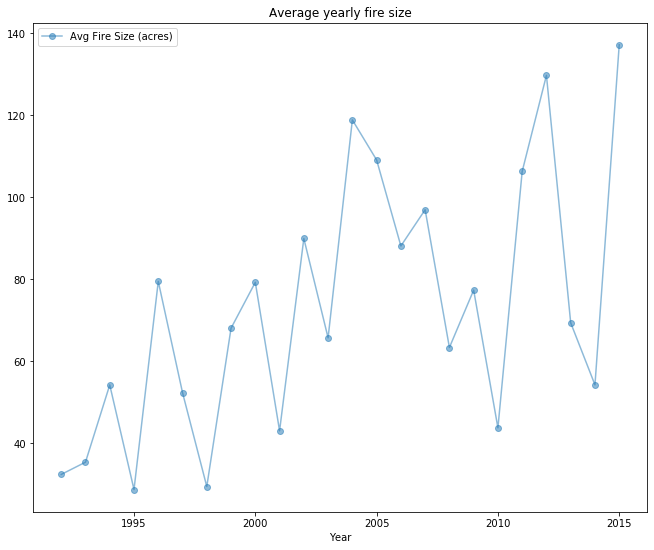

In [9]:
fires_by_year = fires.groupby([fires["DISCOVERY_DATE"].dt.year])["FIRE_SIZE"].mean().rename_axis('Year').rename(level = 0, index = 'Avg Fire Size (acres)')
fires_by_year.plot(y='Avg Fire Size (acres)', marker='o', linestyle='-', alpha=0.5, figsize=(11, 9), legend=True, title='Average yearly fire size')

In [10]:
# Yearly average fire size appears to have a positive trend.

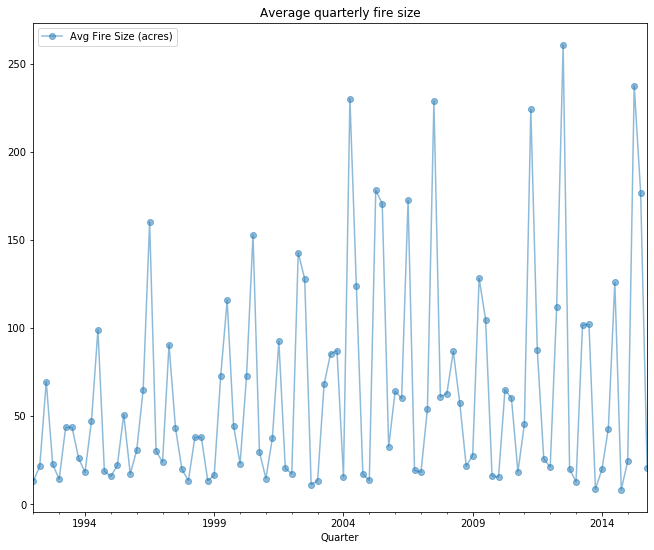

In [11]:
fires_by_quarter = fires.groupby(pd.Grouper(key="DISCOVERY_DATE", freq='Q'))["FIRE_SIZE"].mean().rename_axis('Quarter').rename(level = 0, index = 'Avg Fire Size (acres)')
fires_by_quarter.plot(x='YEAR', y='FIRE_SIZE', marker='o', linestyle='-', alpha=0.5, figsize=(11, 9), legend=True, title='Average quarterly fire size')

In [12]:
# Quarterly average fire size appears to have a subtle positive trend and a seasonality.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


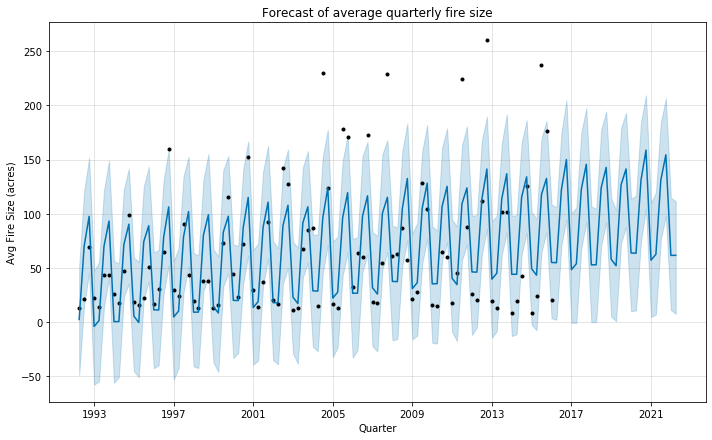

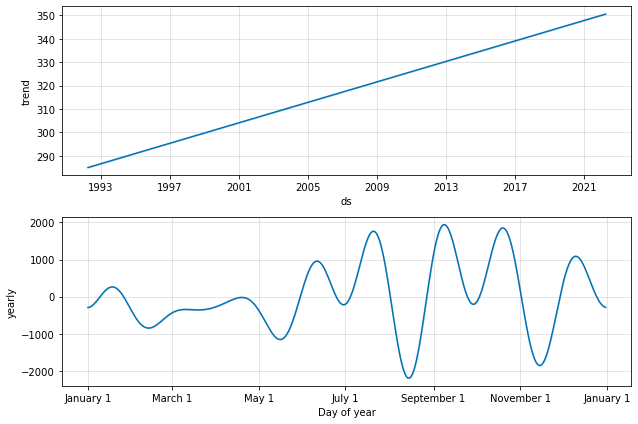

In [13]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

fdf = pd.DataFrame({'ds': fires_by_quarter.index.values.tolist(), 'y': fires_by_quarter.values.tolist()})
dates = pd.to_datetime(fdf['ds'])
fdf['ds']=dates

prophet = Prophet()
prophet.fit(fdf)
future = prophet.make_future_dataframe(periods=25, freq='Q')
forecast = prophet.predict(future)
fig = prophet.plot(forecast, xlabel='Quarter', ylabel='Avg Fire Size (acres)')
ax = fig.gca()
ax.set_title(label='Forecast of average quarterly fire size')

fig2 = prophet.plot_components(forecast)

In [14]:
# We can observe that, as expected, our model found a positive trend and seasonality.
# It appears to reasonably model the data, but it ignores the more extreme fire sizes.

In [71]:
fires_by_quarter

Quarter
1992-03-31     12.714358
1992-06-30     21.561278
1992-09-30     69.444894
1992-12-31     22.442457
1993-03-31     14.007467
                 ...    
2014-12-31      8.124170
2015-03-31     24.246502
2015-06-30    237.473955
2015-09-30    176.580472
2015-12-31     20.121817
Freq: Q-DEC, Name: Avg Fire Size (acres), Length: 96, dtype: float64

In [67]:
# from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

size = 75
train, test = fires_by_quarter[:size], fires_by_quarter[size:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

predicted=26.858366, expected=18.129407
predicted=21.658324, expected=45.196839
predicted=60.201796, expected=224.004782
predicted=101.060782, expected=87.527206
predicted=29.031148, expected=25.612028
predicted=69.780443, expected=20.859410
predicted=157.351335, expected=111.893669
predicted=89.026699, expected=260.692229
predicted=80.837464, expected=19.686930
predicted=17.523897, expected=12.610069
predicted=113.176359, expected=101.510910
predicted=191.324218, expected=101.889822
predicted=68.314345, expected=8.401017
predicted=14.943371, expected=19.554029
predicted=80.851844, expected=42.790784
predicted=78.219944, expected=125.749674
predicted=44.203792, expected=8.124170
predicted=10.128326, expected=24.246502
predicted=54.820692, expected=237.473955
predicted=124.610772, expected=176.580472
predicted=47.370389, expected=20.121817
Test RMSE: 75.312


ValueError: view limit minimum -36798.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units